## HRI OF+PF

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [36]:
%cd
HRI_Phy_DF = pd.read_csv('MHHRI/Affectiva/HRI_Affectiva_Recordings/HRI_Physiological_Feature_Vectors.csv')
HRI_OF_DF=pd.read_csv('MHHRI/Ego/HRI_Ego_Recordings_Part1/FinalFile/HRI_OpenFace_Feature_Vectors.csv')
print(HRI_Phy_DF.shape,HRI_OF_DF.shape)

/home/ubuntu
(525, 31) (360, 187)


In [37]:
list_phy_cols = ['phy_feature_' + str(i) for i in range(1, 31)]
list_b5_t = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness']

In [38]:
list_ego_cols = ['OF_feature_' + str(i) for i in range(1, 187)]

In [39]:
Big_5_weighted = pd.read_csv('MHHRI/Acquitance_Assessments_Personality/Acquaintance_Assessment_Big5_Traits.csv')
Big_5_weighted.tail()

,user,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness
13,U014,5.909091,4.727273,5.136364,4.909091,5.181818
14,U015,5.863636,5.636364,5.227273,5.181818,5.363636
15,U016,5.550000,5.050000,5.900000,5.250000,5.750000
16,U017,4.550000,4.900000,5.000000,5.100000,5.150000
17,U018,5.388889,5.333333,5.333333,4.611111,5.166667


In [40]:
Big_5_weighted_categorised = Big_5_weighted
Big_5_weighted_categorised.tail()

,user,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness
13,U014,5.909091,4.727273,5.136364,4.909091,5.181818
14,U015,5.863636,5.636364,5.227273,5.181818,5.363636
15,U016,5.550000,5.050000,5.900000,5.250000,5.750000
16,U017,4.550000,4.900000,5.000000,5.100000,5.150000
17,U018,5.388889,5.333333,5.333333,4.611111,5.166667


In [41]:
Big_5_weighted_binarised = Big_5_weighted_categorised
Big_5_weighted_binarised[list_b5_t] = (Big_5_weighted_categorised[list_b5_t] >= Big_5_weighted_categorised[list_b5_t].mean()).astype(int)
Big_5_weighted_binarised.head()

,user,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness
0,U001,0,0,0,0,0
1,U002,1,1,0,1,1
2,U003,0,1,0,1,1
3,U004,1,0,1,1,1
4,U005,1,1,1,1,1


In [42]:
HRI_Phy_Big5 = HRI_Phy_DF.merge(Big_5_weighted_binarised, left_on = 'user', right_on = 'user')
HRI_Phy_Big5.tail(60)

,user,phy_feature_1,phy_feature_2,phy_feature_3,phy_feature_4,phy_feature_5,phy_feature_6,phy_feature_7,phy_feature_8,phy_feature_9,...,phy_feature_26,phy_feature_27,phy_feature_28,phy_feature_29,phy_feature_30,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness
465,U004,-0.99,-0.60,-0.799339,0.050013,0.000110,-3.671072e-06,-1.04,-0.56,-0.727313,...,7.455,6.954834,0.074637,-0.000187,-1.651982e-04,1,0,1,1,1
466,U004,-0.23,1.53,0.377588,0.459842,0.000965,-3.585398e-05,0.26,1.22,0.763677,...,3.103,2.731622,0.123285,-0.000053,-2.542373e-05,1,0,1,1,1
467,U004,-1.07,0.25,-0.805782,0.135069,-0.001775,4.071661e-05,-1.57,-0.05,-0.703550,...,7.534,7.195091,0.122619,-0.000316,0.000000e+00,1,0,1,1,1
468,U004,-1.21,-0.71,-0.886995,0.051952,-0.000155,3.238342e-06,-0.92,-0.45,-0.624301,...,7.836,7.597543,0.066395,-0.000023,-1.230570e-04,1,0,1,1,1
469,U004,-0.72,-0.18,-0.317023,0.098402,-0.000054,3.875969e-06,0.31,1.13,0.775163,...,2.799,2.627589,0.069466,0.000137,-1.550388e-05,1,0,1,1,1
470,U004,-0.78,0.24,-0.407425,0.211946,-0.000401,2.787068e-05,-2.00,-0.18,-0.862921,...,7.846,7.554959,0.228895,-0.000090,-2.775920e-04,1,0,1,1,1
471,U004,0.10,1.03,0.658143,0.249836,-0.002946,-1.428571e-04,0.25,1.49,0.632571,...,2.712,2.665814,0.031561,0.000205,1.339286e-04,1,0,1,1,1
472,U004,-0.62,-0.54,-0.579495,0.005699,-0.000006,1.504212e-05,-0.89,-0.77,-0.846751,...,7.948,7.674016,0.065045,-0.000169,1.540313e-04,1,0,1,1,1
473,U004,-0.82,-0.75,-0.795078,0.012311,0.000130,7.812500e-05,-0.77,-0.69,-0.721198,...,6.925,6.847305,0.029362,-0.000198,-4.713542e-04,1,0,1,1,1
474,U004,-0.47,0.59,-0.000194,0.239415,0.000917,-4.409171e-06,-1.64,-0.37,-1.044656,...,7.368,7.264940,0.149577,0.000369,2.186949e-04,1,0,1,1,1


In [43]:
HRI_OF_Big5 = HRI_OF_DF.merge(Big_5_weighted_binarised, left_on = 'user', right_on = 'user')
HRI_OF_Big5.tail(60)

,user,OF_feature_1,OF_feature_2,OF_feature_3,OF_feature_4,OF_feature_5,OF_feature_6,OF_feature_7,OF_feature_8,OF_feature_9,...,OF_feature_182,OF_feature_183,OF_feature_184,OF_feature_185,OF_feature_186,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness
299,U007,-1.282,0.000,-0.141307,0.381500,0.000000e+00,0.000000e+00,0.000,0.867,0.081494,...,0.76,0.019958,0.099319,2.342243e-19,-7.807476e-20,1,1,0,0,1
300,U007,-0.804,-0.529,-0.696682,0.056662,-1.226415e-04,9.770889e-05,0.293,0.441,0.383194,...,1.19,0.190108,0.308767,2.830189e-04,-7.277628e-04,1,1,0,0,1
301,U007,-0.091,1.614,0.376203,0.536332,9.259379e-04,2.797542e-05,-2.270,1.169,0.054125,...,1.59,0.098118,0.285822,1.875809e-04,6.468305e-06,1,1,0,0,1
302,U007,-0.051,1.222,0.378500,0.484086,4.997655e-04,-1.371951e-05,-0.104,0.908,0.226533,...,3.16,0.133630,0.384940,-1.562228e-19,7.811138e-20,1,1,0,0,1
303,U007,0.000,1.255,1.134051,0.069741,-1.438053e-05,-8.185841e-05,0.000,0.646,0.375011,...,1.34,0.176615,0.273932,3.539823e-04,-1.222345e-03,1,1,0,0,1
304,U007,0.000,0.000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000,0.000,0.000000,...,0.00,0.000000,0.000000,0.000000e+00,0.000000e+00,1,1,0,0,1
305,U007,0.000,0.000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000,0.000,0.000000,...,0.00,0.000000,0.000000,0.000000e+00,0.000000e+00,1,1,0,0,1
306,U007,-0.975,0.000,-0.278345,0.318264,5.441176e-04,-1.782531e-05,0.000,0.983,0.189586,...,1.66,0.092032,0.253503,0.000000e+00,-1.546099e-19,1,1,0,0,1
307,U007,-0.486,1.394,0.089130,0.316429,-2.440051e-19,-2.135044e-19,-0.497,1.183,0.048376,...,1.40,0.023390,0.147066,-1.372528e-19,7.625158e-20,1,1,0,0,1
308,U007,-1.300,0.823,-0.142227,0.332062,1.814304e-04,3.448902e-06,-0.677,1.094,0.013541,...,2.49,0.047746,0.196240,-1.061899e-04,-3.222000e-05,1,1,0,0,1


In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [45]:
HRI_Phy_Big5_final = HRI_Phy_Big5
HRI_Phy_Big5_final[list_phy_cols] = scaler.fit_transform(HRI_Phy_Big5[list_phy_cols])
HRI_OF_Big5_final = HRI_OF_Big5
HRI_OF_Big5_final[list_ego_cols] = scaler.fit_transform(HRI_OF_Big5[list_ego_cols])

In [46]:
HRI_Phy_Big5_final.head(10)

,user,phy_feature_1,phy_feature_2,phy_feature_3,phy_feature_4,phy_feature_5,phy_feature_6,phy_feature_7,phy_feature_8,phy_feature_9,...,phy_feature_26,phy_feature_27,phy_feature_28,phy_feature_29,phy_feature_30,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness
0,U005,0.449441,0.653984,0.300890,0.050741,-0.021662,0.044627,-0.924138,-0.834112,-1.292831,...,-0.588260,-0.589043,-0.401016,-0.005154,0.023778,1,1,1,1,1
1,U005,0.830471,-0.230157,0.390257,-0.776019,-0.053580,0.044627,-0.398585,-1.536581,-1.352065,...,-0.603173,-0.591390,-0.484817,-0.048577,0.018147,1,1,1,1,1
2,U005,-0.538415,-0.332666,-0.979160,0.060465,-0.011809,-0.009616,-0.581917,-0.723196,-0.625814,...,-0.589089,-0.580057,-0.452660,-0.026043,0.040877,1,1,1,1,1
3,U005,-0.369069,-0.396735,-0.483785,-0.540994,0.070311,0.193903,-0.667472,-1.203833,-1.096424,...,-0.587846,-0.581247,-0.413334,-0.030202,-0.009654,1,1,1,1,1
4,U005,0.915145,0.231134,0.950502,-0.656281,-0.863331,-1.127426,-0.484140,-0.550660,-0.107102,...,-0.582460,-0.572637,-0.437199,-0.154377,0.044341,1,1,1,1,1
5,U005,0.011962,-0.883653,-0.513070,-0.731267,0.009539,0.044627,-0.251919,-1.290101,-1.091327,...,-0.581218,-0.571404,-0.454672,-0.078889,0.093193,1,1,1,1,1
6,U005,0.675237,0.359270,0.823883,0.147793,0.429219,0.065167,-0.630806,-0.341152,-0.259145,...,-0.476411,-0.551272,0.087707,0.105021,-0.009396,1,1,1,1,1
7,U005,0.026074,-0.858025,-0.488264,-0.690746,-0.047496,0.147981,-0.239697,-1.290101,-1.104750,...,-0.576661,-0.566518,-0.452908,-0.109008,-0.085796,1,1,1,1,1
8,U005,0.759910,-0.217344,0.353988,-0.724397,0.037931,0.107184,-0.435251,-1.524257,-1.352409,...,-0.598616,-0.588504,-0.458055,-0.106330,0.001370,1,1,1,1,1
9,U005,0.788135,-0.166089,0.377626,-0.715925,0.128072,-0.187551,-0.423029,-1.511933,-1.351665,...,-0.598202,-0.590947,-0.473522,-0.091447,0.147869,1,1,1,1,1


In [47]:
HRI_OF_Big5_final.head(10)

,user,OF_feature_1,OF_feature_2,OF_feature_3,OF_feature_4,OF_feature_5,OF_feature_6,OF_feature_7,OF_feature_8,OF_feature_9,...,OF_feature_182,OF_feature_183,OF_feature_184,OF_feature_185,OF_feature_186,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness
0,U018,0.734063,-0.776059,-0.114518,-0.934960,0.013953,-0.002860,0.614874,-0.974565,-0.505683,...,-0.950422,-0.667230,-0.842559,-0.079052,0.061999,0,0,1,0,0
1,U018,-1.412239,-0.094992,-0.882068,1.315742,0.861960,0.017509,0.081588,1.079955,0.549721,...,0.981782,0.915736,1.399288,-1.079717,0.043201,0,0,1,0,0
2,U018,-1.251191,-0.776059,-0.133411,-0.493321,0.013953,-0.002860,-0.123992,0.530154,-0.483602,...,-0.388506,-0.645748,-0.660943,-0.079052,0.061999,0,0,1,0,0
3,U018,0.734063,-0.776059,-0.114518,-0.934960,0.013953,-0.002860,0.614874,-0.974565,-0.505683,...,-0.950422,-0.667230,-0.842559,-0.079052,0.061999,0,0,1,0,0
4,U018,0.734063,-0.776059,-0.114518,-0.934960,0.013953,-0.002860,0.614874,-0.974565,-0.505683,...,-0.950422,-0.667230,-0.842559,-0.079052,0.061999,0,0,1,0,0
5,U018,0.734063,-0.776059,-0.114518,-0.934960,0.013953,-0.002860,0.614874,-0.974565,-0.505683,...,-0.950422,-0.667230,-0.842559,-0.079052,0.061999,0,0,1,0,0
6,U018,0.734063,-0.776059,-0.114518,-0.934960,0.013953,-0.002860,0.614874,-0.974565,-0.505683,...,-0.950422,-0.667230,-0.842559,-0.079052,0.061999,0,0,1,0,0
7,U018,0.734063,-0.776059,-0.114518,-0.934960,0.013953,-0.002860,0.614874,-0.974565,-0.505683,...,-0.950422,-0.667230,-0.842559,-0.079052,0.061999,0,0,1,0,0
8,U018,0.734063,-0.776059,-0.114518,-0.934960,0.013953,-0.002860,0.614874,-0.974565,-0.505683,...,-0.950422,-0.667230,-0.842559,-0.079052,0.061999,0,0,1,0,0
9,U018,0.734063,-0.776059,-0.114518,-0.934960,0.013953,-0.002860,0.614874,-0.974565,-0.505683,...,-0.950422,-0.667230,-0.842559,-0.079052,0.061999,0,0,1,0,0


## Extraversion 

### Phy

In [48]:
X_Phy = HRI_Phy_Big5_final[list_phy_cols].to_numpy()
Y_Phy = HRI_Phy_Big5_final['Extraversion'].to_numpy()

In [49]:
X_train_Phy, X_test_Phy, Y_train_Phy, Y_test_Phy = train_test_split(X_Phy, Y_Phy, test_size=0.13, shuffle=False)

In [50]:
clf = SVC()
clf.fit(X_train_Phy, Y_train_Phy)
clf.score(X_test_Phy, Y_test_Phy)

0.2463768115942029

In [51]:
Y_preds_Phy = clf.predict(X_test_Phy)
print(classification_report(Y_test_Phy, Y_preds_Phy))

              precision    recall  f1-score   support

           0       0.19      0.18      0.19        33
           1       0.29      0.31      0.30        36

    accuracy                           0.25        69
   macro avg       0.24      0.24      0.24        69
weighted avg       0.24      0.25      0.24        69



In [52]:
scores_Phy = cross_val_score(clf, X_Phy, Y_Phy, cv=18)
print(scores_Phy)
print(np.mean(scores_Phy))

[0.83333333 0.96666667 0.9        0.82758621 0.79310345 0.48275862
 0.65517241 0.51724138 0.75862069 0.75862069 0.93103448 0.82758621
 0.5862069  0.79310345 0.51724138 0.82758621 0.5862069  0.68965517]
0.7362068965517241


### OF

In [53]:
X_OF = HRI_OF_Big5_final[list_ego_cols].to_numpy()
Y_OF = HRI_OF_Big5_final['Extraversion'].to_numpy()

In [54]:
X_train_OF, X_test_OF, Y_train_OF, Y_test_OF = train_test_split(X_OF, Y_OF, test_size=0.13, shuffle=False)

In [55]:
clf2 = SVC(kernel='linear')
clf2.fit(X_train_OF, Y_train_OF)
clf2.score(X_test_OF, Y_test_OF)

0.2765957446808511

In [56]:
Y_preds_OF = clf2.predict(X_test_OF)
print(classification_report(Y_test_OF, Y_preds_OF))

              precision    recall  f1-score   support

           0       0.50      0.18      0.26        34
           1       0.20      0.54      0.29        13

    accuracy                           0.28        47
   macro avg       0.35      0.36      0.28        47
weighted avg       0.42      0.28      0.27        47



In [57]:
scores_OF = cross_val_score(clf2, X_OF, Y_OF, cv=18)
print(scores_OF)
print(np.mean(scores_OF))

[0.35       0.6        0.6        0.25       0.45       0.7
 0.65       0.6        0.7        0.65       0.65       0.65
 0.5        0.6        0.65       0.65       0.7        0.52631579]
0.5820175438596491


In [24]:
# from matplotlib import pyplot as plt

# def f_importances(coef, names):
#     imp = coef
#     imp,names = zip(*sorted(zip(imp,names)))
#     plt.barh(range(len(names)), imp, align='center')
#     plt.yticks(range(len(names)), names)
#     plt.show()

# features_names = list_ego_cols
# # svm = svm.SVC(kernel='linear')
# # svm.fit(X, Y)
# f_importances(clf2.coef_, features_names)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [26]:
# rf = RandomForestClassifier()
# rf.fit(X_train_OF, Y_train_OF)
# print(rf.feature_importances_)
# importances = rf.feature_importances_
# indices = np.argsort(importances)[-10:]
# features = list_ego_cols
# plt.title('Feature Importances')
# plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)), [features[i] for i in indices])
# plt.xlabel('Relative Importance')
# plt.show()

### Ensmble

In [58]:
alpha = 0.1
Y_final =[]
for i in range(len(Y_preds_OF)):
    Y_final.append(int(alpha*Y_preds_OF[i] + (1-alpha)*Y_preds_Phy[i]))
#     Y_final.append(int(Y_preds_OF[i] and Y_preds_Phy[i] ))
Y_final

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1]

In [59]:
from sklearn.metrics import f1_score

In [60]:
f1_score(Y_test_OF, Y_final)

0.07407407407407408

In [61]:
Y_preds_OF, Y_preds_Phy

(array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 0, 1]),
 array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1]))

## Openness

In [62]:
X_OF = HRI_OF_Big5_final[list_ego_cols].to_numpy()
Y_OF = HRI_OF_Big5_final['Openness'].to_numpy()
X_Phy = HRI_Phy_Big5_final[list_phy_cols].to_numpy()
Y_Phy = HRI_Phy_Big5_final['Openness'].to_numpy()

In [63]:
X_train_Phy, X_test_Phy, Y_train_Phy, Y_test_Phy = train_test_split(X_Phy, Y_Phy, test_size=0.13, shuffle=False)
X_train_OF, X_test_OF, Y_train_OF, Y_test_OF = train_test_split(X_OF, Y_OF, test_size=0.13, shuffle=False)

In [64]:
clf = SVC()
clf.fit(X_train_Phy, Y_train_Phy)
clf.score(X_test_Phy, Y_test_Phy)

0.7101449275362319

In [65]:
Y_preds_Phy = clf.predict(X_test_Phy)
print(classification_report(Y_test_Phy, Y_preds_Phy))
scores_Phy = cross_val_score(clf, X_Phy, Y_Phy, cv=18)
print(scores_Phy)
print(np.mean(scores_Phy))

              precision    recall  f1-score   support

           0       0.20      1.00      0.33         5
           1       1.00      0.69      0.81        64

    accuracy                           0.71        69
   macro avg       0.60      0.84      0.57        69
weighted avg       0.94      0.71      0.78        69

[0.76666667 0.93333333 0.86666667 0.93103448 0.72413793 0.37931034
 0.72413793 0.65517241 0.5862069  0.68965517 0.75862069 0.96551724
 0.86206897 0.44827586 0.5862069  0.48275862 0.82758621 0.89655172]
0.7268837803320561


[0.03697288 0.02536106 0.04227298 0.00916917 0.00446453 0.00615235
 0.01686078 0.01258338 0.02696075 0.00944483 0.0045227  0.00600412
 0.0207341  0.01806601 0.04502901 0.00743984 0.00645213 0.00838143
 0.11138049 0.10751274 0.10680107 0.00452921 0.00311125 0.00247642
 0.08267085 0.11226398 0.10186356 0.03662342 0.01750183 0.00639311]


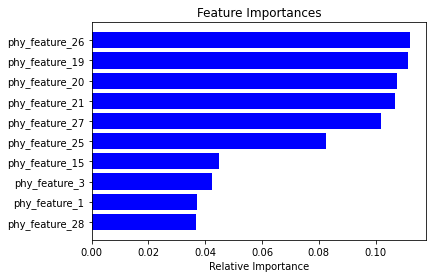

In [33]:
from matplotlib import pyplot as plt
rf = RandomForestClassifier()
rf.fit(X_train_Phy, Y_train_Phy)
print(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]
features = list_phy_cols
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [66]:
clf2 = SVC()
clf2.fit(X_train_OF, Y_train_OF)
clf2.score(X_test_OF, Y_test_OF)

0.5957446808510638

In [67]:
Y_preds_OF = clf2.predict(X_test_OF)
print(classification_report(Y_test_OF, Y_preds_OF))
scores_OF = cross_val_score(clf, X_OF, Y_OF, cv=18)
print(scores_OF)
print(np.mean(scores_OF))

              precision    recall  f1-score   support

           0       0.45      0.28      0.34        18
           1       0.64      0.79      0.71        29

    accuracy                           0.60        47
   macro avg       0.55      0.54      0.53        47
weighted avg       0.57      0.60      0.57        47

[0.45       0.55       0.55       0.5        0.65       0.7
 0.8        0.65       0.55       0.6        0.45       0.7
 0.6        0.65       0.55       0.6        0.55       0.42105263]
0.5845029239766082


[0.00525517 0.0049441  0.005264   0.00564395 0.00186167 0.00433435
 0.00515104 0.00756107 0.01091926 0.01333145 0.00066853 0.00269142
 0.00014565 0.00821531 0.00797597 0.00692349 0.00640185 0.00191553
 0.00014493 0.00217714 0.0081881  0.00394718 0.00557906 0.00260235
 0.01642508 0.00076911 0.00633611 0.00372942 0.00717412 0.0011788
 0.00690496 0.00614647 0.00761131 0.01376222 0.00749788 0.00289218
 0.0053487  0.00553099 0.00691295 0.00683989 0.00352433 0.00143746
 0.00755369 0.00643582 0.00510562 0.00789633 0.00824719 0.00214595
 0.00690203 0.00508429 0.00759925 0.01211599 0.01124915 0.00386856
 0.00409619 0.00620212 0.01196214 0.00819747 0.00719275 0.00236176
 0.0038023  0.00746295 0.00827236 0.00524732 0.00535516 0.00375288
 0.00876601 0.0044043  0.00622804 0.00764001 0.00820635 0.00180922
 0.00375391 0.00999377 0.01548361 0.00560798 0.01041651 0.00378281
 0.00374411 0.02848711 0.01781803 0.00738894 0.00797744 0.00287195
 0.         0.00261173 0.00437614 0.00666383 0.00190845 0.00175

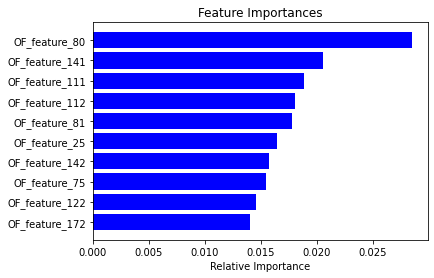

In [40]:
from matplotlib import pyplot as plt
rf = RandomForestClassifier()
rf.fit(X_train_OF, Y_train_OF)
print(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]
features = list_ego_cols
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [68]:
alpha = 0.1
Y_final =[]
for i in range(len(Y_preds_OF)):
    Y_final.append(int(alpha*Y_preds_OF[i] + (1-alpha)*Y_preds_Phy[i]))
#     Y_final.append(int(Y_preds_OF[i] and Y_preds_Phy[i] ))
f1_score(Y_test_OF, Y_final)

0.44

## Agreeableness

In [ ]:
Agreeableness	Conscientiousness	Neuroticism	Openness

In [69]:
X_OF = HRI_OF_Big5_final[list_ego_cols].to_numpy()
Y_OF = HRI_OF_Big5_final['Agreeableness'].to_numpy()
X_Phy = HRI_Phy_Big5_final[list_phy_cols].to_numpy()
Y_Phy = HRI_Phy_Big5_final['Agreeableness'].to_numpy()

In [70]:
X_train_Phy, X_test_Phy, Y_train_Phy, Y_test_Phy = train_test_split(X_Phy, Y_Phy, test_size=0.13, shuffle=False)
X_train_OF, X_test_OF, Y_train_OF, Y_test_OF = train_test_split(X_OF, Y_OF, test_size=0.13, shuffle=False)

In [71]:
clf = SVC()
clf.fit(X_train_Phy, Y_train_Phy)
clf.score(X_test_Phy, Y_test_Phy)

0.6231884057971014

In [72]:
Y_preds_Phy = clf.predict(X_test_Phy)
print(classification_report(Y_test_Phy, Y_preds_Phy))
scores_Phy = cross_val_score(clf, X_Phy, Y_Phy, cv=18)
print(scores_Phy)
print(np.mean(scores_Phy))

/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.62      0.77        69
           1       0.00      0.00      0.00         0

    accuracy                           0.62        69
   macro avg       0.50      0.31      0.38        69
weighted avg       1.00      0.62      0.77        69

[0.76666667 0.5        0.83333333 0.86206897 0.93103448 0.96551724
 0.65517241 0.62068966 0.79310345 0.96551724 0.89655172 0.44827586
 0.55172414 0.62068966 0.89655172 0.82758621 0.68965517 0.75862069]
0.7545977011494254


[0.02261028 0.02348194 0.04186081 0.01154141 0.00820975 0.00660258
 0.01850892 0.01560244 0.01928704 0.01417039 0.00802105 0.00844311
 0.02026937 0.02486013 0.04199899 0.01411038 0.0095729  0.00799844
 0.03390147 0.03492275 0.04133028 0.00679052 0.00567465 0.00553547
 0.10333259 0.17410688 0.16260687 0.07117163 0.03041469 0.01306229]


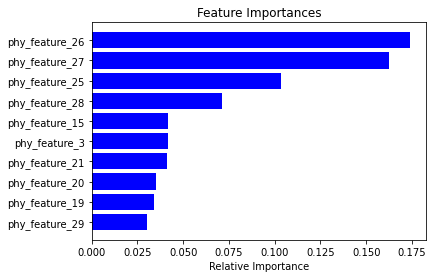

In [85]:
from matplotlib import pyplot as plt
rf = RandomForestClassifier()
rf.fit(X_train_Phy, Y_train_Phy)
print(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]
features = list_phy_cols
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [73]:
clf2 = SVC()
clf2.fit(X_train_OF, Y_train_OF)
clf2.score(X_test_OF, Y_test_OF)

0.48936170212765956

In [74]:
Y_preds_OF = clf2.predict(X_test_OF)
print(classification_report(Y_test_OF, Y_preds_OF))
scores_OF = cross_val_score(clf, X_OF, Y_OF, cv=18)
print(scores_OF)
print(np.mean(scores_OF))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65        34
           1       0.08      0.08      0.08        13

    accuracy                           0.49        47
   macro avg       0.36      0.36      0.36        47
weighted avg       0.49      0.49      0.49        47

[0.65       0.65       0.7        0.25       0.65       0.65
 0.65       0.7        0.6        0.6        0.6        0.6
 0.65       0.5        0.55       0.6        0.7        0.68421053]
0.610233918128655


[0.00477951 0.0080563  0.01197843 0.00939989 0.00325211 0.00278746
 0.00934164 0.00669308 0.00953794 0.00715026 0.00180528 0.00144895
 0.00093513 0.00876206 0.00762074 0.00939576 0.01488918 0.00311368
 0.00170113 0.00191447 0.00808773 0.00888614 0.00512812 0.00286902
 0.00802339 0.00218443 0.0064067  0.00694296 0.0058862  0.0058494
 0.006576   0.00452299 0.00812801 0.00834993 0.00994583 0.00682966
 0.00926154 0.01308004 0.0155806  0.00805781 0.00961328 0.00313078
 0.00719487 0.00831129 0.01247976 0.00667455 0.00878801 0.00357299
 0.01581244 0.00824793 0.01123807 0.00687197 0.00989698 0.00641929
 0.00902501 0.00698055 0.01121808 0.00603471 0.00773381 0.00334625
 0.00885594 0.00251006 0.00929982 0.01015108 0.01118143 0.00386129
 0.00957868 0.01159826 0.01003385 0.00827623 0.00878772 0.00134332
 0.00523283 0.01190096 0.01106001 0.01263543 0.01202079 0.00491383
 0.00267411 0.01076082 0.00404032 0.00713038 0.0076688  0.00731387
 0.         0.0072281  0.00609943 0.00448837 0.00060865 0.00109

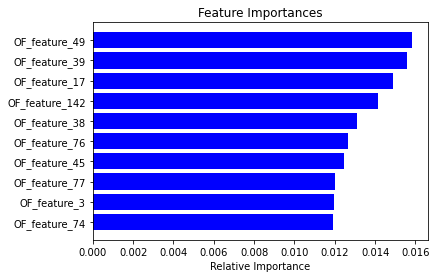

In [88]:
from matplotlib import pyplot as plt
rf = RandomForestClassifier()
rf.fit(X_train_OF, Y_train_OF)
print(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]
features = list_ego_cols
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [75]:
alpha = 0.1
Y_final =[]
for i in range(len(Y_preds_OF)):
    Y_final.append(int(alpha*Y_preds_OF[i] + (1-alpha)*Y_preds_Phy[i]))
#     Y_final.append(int(Y_preds_OF[i] and Y_preds_Phy[i] ))
f1_score(Y_test_OF, Y_final)

0.0

##  Conscientiousness

In [98]:
Conscientiousness	Neuroticism

SyntaxError: invalid syntax (2251504506.py, line 1)

In [76]:
X_OF = HRI_OF_Big5_final[list_ego_cols].to_numpy()
Y_OF = HRI_OF_Big5_final['Conscientiousness'].to_numpy()
X_Phy = HRI_Phy_Big5_final[list_phy_cols].to_numpy()
Y_Phy = HRI_Phy_Big5_final['Conscientiousness'].to_numpy()

In [81]:
X_train_Phy, X_test_Phy, Y_train_Phy, Y_test_Phy = train_test_split(X_Phy, Y_Phy, test_size=0.13, shuffle=False)
X_train_OF, X_test_OF, Y_train_OF, Y_test_OF = train_test_split(X_OF, Y_OF, test_size=0.23, shuffle=False)

In [82]:
clf = SVC()
clf.fit(X_train_Phy, Y_train_Phy)
clf.score(X_test_Phy, Y_test_Phy)

0.34782608695652173

In [83]:
Y_preds_Phy = clf.predict(X_test_Phy)
print(classification_report(Y_test_Phy, Y_preds_Phy))
scores_Phy = cross_val_score(clf, X_Phy, Y_Phy, cv=18)
print(scores_Phy)
print(np.mean(scores_Phy))

/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.35      0.52        69

    accuracy                           0.35        69
   macro avg       0.50      0.17      0.26        69
weighted avg       1.00      0.35      0.52        69

[0.76666667 0.96666667 1.         0.89655172 0.93103448 1.
 0.82758621 0.75862069 0.79310345 0.82758621 0.96551724 0.79310345
 0.         0.37931034 0.48275862 0.5862069  0.44827586 0.4137931 ]
0.713154533844189


[0.03453657 0.0672041  0.09434702 0.0125796  0.01055936 0.00818923
 0.03719633 0.01612274 0.04627247 0.01460195 0.01086515 0.00846885
 0.01559073 0.01443125 0.01438706 0.02004453 0.00782602 0.00542089
 0.03214926 0.02735642 0.06474004 0.01072045 0.00524044 0.00528064
 0.09517349 0.11245618 0.14595433 0.04670526 0.00825039 0.00732926]


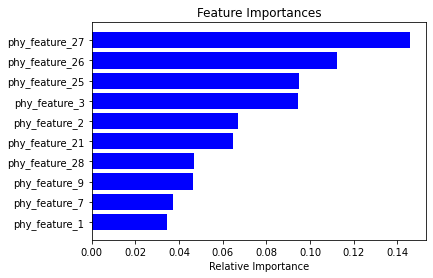

In [137]:
from matplotlib import pyplot as plt
rf = RandomForestClassifier()
rf.fit(X_train_Phy, Y_train_Phy)
print(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]
features = list_phy_cols
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [84]:
clf2 = SVC()
clf2.fit(X_train_OF, Y_train_OF)
clf2.score(X_test_OF, Y_test_OF)

0.5180722891566265

In [85]:
Y_preds_OF = clf2.predict(X_test_OF)
print(classification_report(Y_test_OF, Y_preds_OF))
scores_OF = cross_val_score(clf, X_OF, Y_OF, cv=18)
print(scores_OF)
print(np.mean(scores_OF))

              precision    recall  f1-score   support

           0       0.62      0.57      0.59        51
           1       0.39      0.44      0.41        32

    accuracy                           0.52        83
   macro avg       0.50      0.50      0.50        83
weighted avg       0.53      0.52      0.52        83

[0.5        0.55       0.6        0.75       0.7        0.65
 0.8        0.55       0.7        0.55       0.5        0.6
 0.5        0.65       0.6        0.6        0.55       0.57894737]
0.6071637426900586


[0.00973    0.00561133 0.00775679 0.01471302 0.00317532 0.00217534
 0.00932216 0.00682882 0.01080845 0.00468782 0.00209495 0.
 0.00024108 0.00427611 0.00699246 0.00569284 0.01117749 0.0044677
 0.00065033 0.00093819 0.01112455 0.00936727 0.00743982 0.00722161
 0.01321249 0.00035715 0.00672086 0.00611318 0.01039652 0.00381494
 0.00342737 0.00524761 0.00607515 0.00450741 0.01284215 0.00369131
 0.01012382 0.00476088 0.01172697 0.00805545 0.01159235 0.00383512
 0.00636648 0.0055358  0.01136109 0.00988621 0.00855266 0.00362717
 0.01915896 0.01442478 0.01912668 0.01216826 0.01770635 0.00452901
 0.00507011 0.00685665 0.00774421 0.01024803 0.0092479  0.00285138
 0.00965071 0.00731195 0.00706796 0.00947373 0.01015322 0.00315581
 0.0070932  0.00639541 0.00864036 0.008627   0.01311791 0.00477042
 0.00331016 0.01162196 0.01094438 0.00798554 0.01657606 0.00468827
 0.00383243 0.01284566 0.02013129 0.00991583 0.0059778  0.00418621
 0.         0.00538393 0.00358787 0.00445797 0.00125205 0.00111361
 0. 

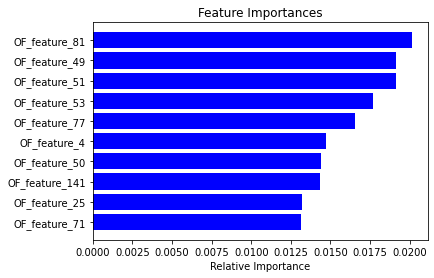

In [140]:
from matplotlib import pyplot as plt
rf = RandomForestClassifier()
rf.fit(X_train_OF, Y_train_OF)
print(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]
features = list_ego_cols
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [86]:
alpha = 0
Y_final =[]
for i in range(len(Y_preds_OF)):
    Y_final.append(int(alpha*Y_preds_OF[i] + (1-alpha)*Y_preds_Phy[i]))
#     Y_final.append(int(Y_preds_OF[i] and Y_preds_Phy[i] ))
print(Y_final, Y_test_OF)
f1_score(Y_test_OF, Y_final)

IndexError: index 69 is out of bounds for axis 0 with size 69

## Neuroticism

In [87]:
X_OF = HRI_OF_Big5_final[list_ego_cols].to_numpy()
Y_OF = HRI_OF_Big5_final['Neuroticism'].to_numpy()
X_Phy = HRI_Phy_Big5_final[list_phy_cols].to_numpy()
Y_Phy = HRI_Phy_Big5_final['Neuroticism'].to_numpy()

In [91]:
X_train_Phy, X_test_Phy, Y_train_Phy, Y_test_Phy = train_test_split(X_Phy, Y_Phy, test_size=0.13, shuffle=False)
X_train_OF, X_test_OF, Y_train_OF, Y_test_OF = train_test_split(X_OF, Y_OF, test_size=0.25, shuffle=False)

In [92]:
clf = SVC()
clf.fit(X_train_Phy, Y_train_Phy)
clf.score(X_test_Phy, Y_test_Phy)

0.3333333333333333

In [93]:
Y_preds_Phy = clf.predict(X_test_Phy)
print(classification_report(Y_test_Phy, Y_preds_Phy))
scores_Phy = cross_val_score(clf, X_Phy, Y_Phy, cv=18)
print(scores_Phy)
print(np.mean(scores_Phy))

              precision    recall  f1-score   support

           0       0.33      0.39      0.36        33
           1       0.33      0.28      0.30        36

    accuracy                           0.33        69
   macro avg       0.33      0.34      0.33        69
weighted avg       0.33      0.33      0.33        69

[0.66666667 0.76666667 0.66666667 0.93103448 1.         0.65517241
 0.5862069  0.62068966 0.06896552 0.51724138 0.55172414 0.86206897
 0.65517241 0.65517241 0.75862069 0.55172414 0.82758621 0.4137931 ]
0.6530651340996169


[0.02492565 0.02662267 0.05183421 0.01854925 0.00860002 0.01027206
 0.02115374 0.04130568 0.02843633 0.02214531 0.00986574 0.00948588
 0.01592726 0.02940284 0.02681473 0.01674343 0.01231399 0.0088023
 0.04130296 0.03704087 0.04985233 0.01108253 0.00720731 0.00616201
 0.16497112 0.11814128 0.11998146 0.0405504  0.01306628 0.00744037]


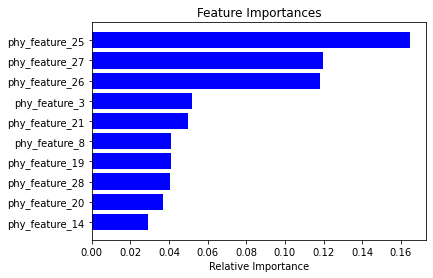

In [161]:
from matplotlib import pyplot as plt
rf = RandomForestClassifier()
rf.fit(X_train_Phy, Y_train_Phy)
print(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]
features = list_phy_cols
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [94]:
clf2 = SVC()
clf2.fit(X_train_OF, Y_train_OF)
clf2.score(X_test_OF, Y_test_OF)

0.5444444444444444

In [95]:
Y_preds_OF = clf2.predict(X_test_OF)
print(classification_report(Y_test_OF, Y_preds_OF))
scores_OF = cross_val_score(clf, X_OF, Y_OF, cv=18)
print(scores_OF)
print(np.mean(scores_OF))

              precision    recall  f1-score   support

           0       0.53      1.00      0.70        47
           1       1.00      0.05      0.09        43

    accuracy                           0.54        90
   macro avg       0.77      0.52      0.39        90
weighted avg       0.76      0.54      0.41        90

[0.65       0.65       0.65       0.6        0.6        0.5
 0.6        0.55       0.6        0.6        0.6        0.45
 0.5        0.6        0.55       0.6        0.65       0.57894737]
0.5849415204678363


[0.0069991  0.01966415 0.00625384 0.0044332  0.00035993 0.
 0.00708685 0.00907184 0.03122566 0.00395762 0.00012282 0.00065523
 0.         0.01140923 0.0072423  0.01355559 0.0053312  0.00311288
 0.00048283 0.00047298 0.00190942 0.01456657 0.00463708 0.00389379
 0.00384351 0.00025646 0.00711687 0.01336524 0.00868066 0.00104566
 0.00502133 0.00351639 0.01256344 0.00507844 0.00800923 0.00020497
 0.02714259 0.0094176  0.00983528 0.00550013 0.0031606  0.002593
 0.00418023 0.0057986  0.00522609 0.00424767 0.00601652 0.00222925
 0.00599954 0.00720438 0.01668729 0.01062764 0.00981891 0.00163981
 0.00476761 0.00336101 0.01513924 0.00664678 0.00763242 0.00137236
 0.00476177 0.00275071 0.00655106 0.00297655 0.01033071 0.00373487
 0.00522945 0.00966977 0.01619778 0.00416177 0.01351454 0.00367546
 0.01124255 0.01213972 0.01762707 0.01387459 0.00320615 0.00107901
 0.00097889 0.02921854 0.00902751 0.03381747 0.00777477 0.00342432
 0.         0.00240052 0.00679297 0.         0.         0.00052479
 0.  

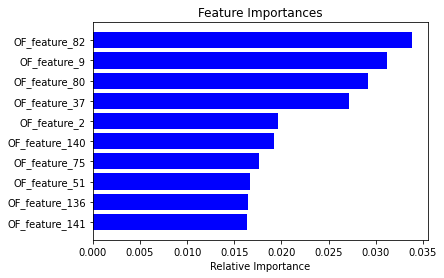

In [165]:
from matplotlib import pyplot as plt
rf = RandomForestClassifier()
rf.fit(X_train_OF, Y_train_OF)
print(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]
features = list_ego_cols
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [166]:
alpha = 0.1
Y_final =[]
for i in range(len(Y_preds_OF)):
    Y_final.append(int(alpha*Y_preds_OF[i] + (1-alpha)*Y_preds_Phy[i]))
#     Y_final.append(int(Y_preds_OF[i] and Y_preds_Phy[i] ))
print(Y_final, Y_test_OF)
f1_score(Y_test_OF, Y_final)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


0.0

## Acquaintance